#### Name: Naim K.
#### Mailid: Khannaim33@gmail.com

## Logistic Regression:

#### Probelm Statement:

Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)

* Import required libraries

In [1986]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Data load

In [1987]:
df= pd.read_csv(r'C:\Users\Fahim\Downloads\LogisticRegressionWithPython\New Folder\Heart.csv')
print("Data imported successfully")

Data imported successfully


#### Details:

This dataset has 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

#### Attribute Information:

* HeartDisease: 0 for no presence of heart disease, 1 for presence of heart disease
* Age:
* Male: Sex
* ChestPainType: chest pain type (4 values)
* BloodPressure: resting blood pressure
* Cholesterol: serum cholestoral in mg/dl
* BloodSugar: fasting blood sugar > 120 mg/dl
* EEG: resting electrocardiographic results (values 0,1,2)
* MaxHR: maximum heart rate achieved
* Angina: exercise induced angina
* OldPeak: ST depression induced by exercise relative to rest
* PeakST: the slope of the peak exercise ST segment
* Flourosopy: number of major vessels (0-3) colored by flourosopy
* Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [1988]:
df.head()

,HeartDisease,Age,Male,ChestPainType,BloodPressure,Cholesterol,BloodSugar,EEG,MaxHR,Angina,OldPeak,PeakST,Flourosopy,Thal
0,1,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,0,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,1,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,0,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,0,74,0,2,120,269,0,2,121,1,0.2,1,1,3


#### Data Understanding

In [1989]:
df.shape # The dataset contains 270 records and 14 columns 

(270, 14)

In [1990]:
df.isnull().sum() # There is no null present in the given dataset

HeartDisease     0
Age              0
Male             0
ChestPainType    0
BloodPressure    0
Cholesterol      0
BloodSugar       0
EEG              0
MaxHR            0
Angina           0
OldPeak          0
PeakST           0
Flourosopy       0
Thal             0
dtype: int64

In [1991]:
df.info() # There are 13 column with datatype int64 except "OldPeak"  which has datatype float64      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HeartDisease   270 non-null    int64  
 1   Age            270 non-null    int64  
 2   Male           270 non-null    int64  
 3   ChestPainType  270 non-null    int64  
 4   BloodPressure  270 non-null    int64  
 5   Cholesterol    270 non-null    int64  
 6   BloodSugar     270 non-null    int64  
 7   EEG            270 non-null    int64  
 8   MaxHR          270 non-null    int64  
 9   Angina         270 non-null    int64  
 10  OldPeak        270 non-null    float64
 11  PeakST         270 non-null    int64  
 12  Flourosopy     270 non-null    int64  
 13  Thal           270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [1992]:
df.describe().transpose() # By using describe function from Pandas we can primary understanding of the dataset.

,count,mean,std,min,25%,50%,75%,max
HeartDisease,270.0,0.444444,0.497827,0.0,0.0,0.0,1.0,1.0
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Male,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
ChestPainType,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BloodPressure,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
BloodSugar,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EEG,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
MaxHR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0


#### Feature Engineering

In [1993]:
# From the dataset, we can see column Male has values both 0 and 1 where we can consider 1 as Male and 0 as Female

In [1994]:
# So, here we are going to replace Column name 'Male' to 'Sex'

df = df.rename(columns={'Male': 'Sex'})

In [1995]:
df.head() # As we can column name Male has been changed from Male to 'Sex' by using rename function.

,HeartDisease,Age,Sex,ChestPainType,BloodPressure,Cholesterol,BloodSugar,EEG,MaxHR,Angina,OldPeak,PeakST,Flourosopy,Thal
0,1,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,0,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,1,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,0,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,0,74,0,2,120,269,0,2,121,1,0.2,1,1,3


#### Exploratory Data Analysis ( EDA )

* Now, we are going to perform some EDA on the dataset and will put our insights as well on this.

In [1996]:
# Countplot on Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

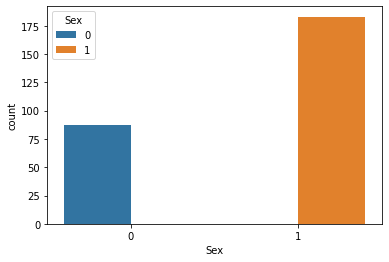

In [1997]:
sns.countplot(data=df, x = 'Sex', hue='Sex')

* Insight: As we can see, the number of 'Male' patient is greater in the given dataset than 'Female'

In [1998]:
# Countplot on Heartdisease

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

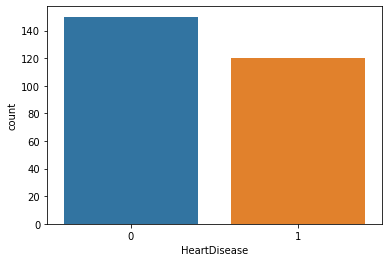

In [1999]:
sns.countplot(data=df, x = 'HeartDisease')

* Insights: Total count of patient who dose not has Heartdisease are greater than number of patietn who has Heartdisease

In [2000]:
# let's draw pairplot to relationship betweem some selected coumn

In [2001]:
colums = ['Age','BloodPressure','BloodSugar','Cholesterol','HeartDisease']

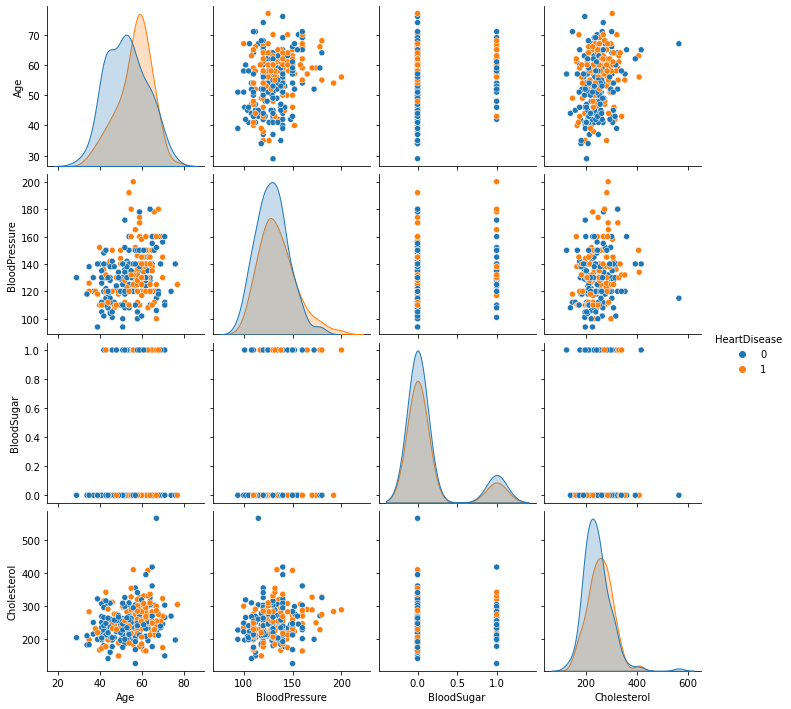

In [2002]:
sns.pairplot(df[colums], hue='HeartDisease')

* Insights:
* 1) Based on the above chart, we can see that there is no seperation between who is likely to have heart diseases or not.
* 2) We can se Age, BloodPressure and Cholesterol has dependency on Heartdiseases whereas BloodSugar has not much

In [2003]:
# Here is the heatmap for dataset to check teh correlation between all columns

In [2004]:
df.corr()

,HeartDisease,Age,Sex,ChestPainType,BloodPressure,Cholesterol,BloodSugar,EEG,MaxHR,Angina,OldPeak,PeakST,Flourosopy,Thal
HeartDisease,1.000000,0.212322,0.297721,0.417436,0.155383,0.118021,-0.016319,0.182091,-0.418514,0.419303,0.417967,0.337616,0.455336,0.525020
Age,0.212322,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,0.297721,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
ChestPainType,0.417436,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BloodPressure,0.155383,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.118021,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
BloodSugar,-0.016319,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EEG,0.182091,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
MaxHR,-0.418514,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Angina,0.419303,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449


In [2005]:
# Heatmap

<AxesSubplot:>

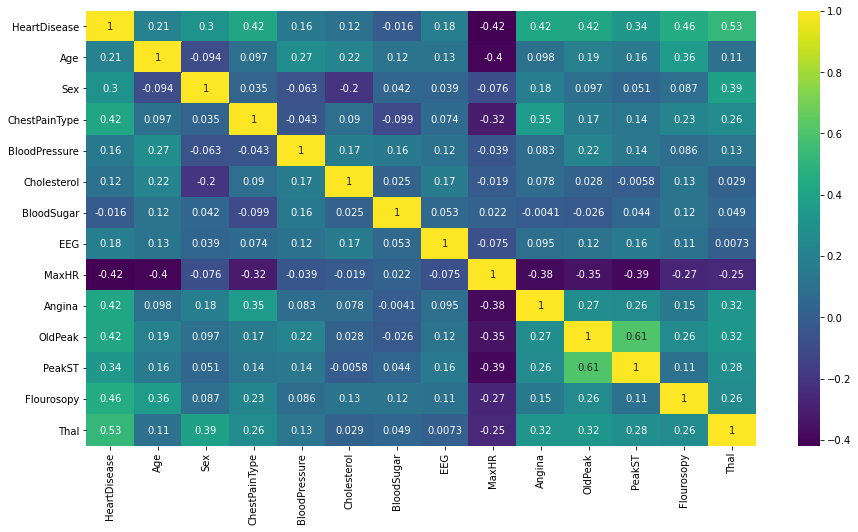

In [2006]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

* Insights: Based on the correlation, we can see that chest pain has highest correlation with target.

#### Data Sampling

In [2007]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df,test_size=0.2,random_state=123)

df_train_x = df_train.iloc[:,1:]
df_train_y = df_train[['HeartDisease']]

df_test_x = df_test.iloc[:,1:]
df_test_y = df_test[['HeartDisease']]

In [2008]:
print(df_train_x.shape)
print(df_train_y.shape)

print(df_test_x.shape)
print(df_test_y.shape)

(216, 13)
(216, 1)
(54, 13)
(54, 1)


In [2009]:
df_train_x.columns

Index(['Age', 'Sex', 'ChestPainType', 'BloodPressure', 'Cholesterol',
       'BloodSugar', 'EEG', 'MaxHR', 'Angina', 'OldPeak', 'PeakST',
       'Flourosopy', 'Thal'],
      dtype='object')

In [2010]:
df_train_y.columns

Index(['HeartDisease'], dtype='object')

###  1) Build Logistic Regression

In [2011]:
from sklearn.linear_model import LogisticRegression

In [2012]:
logreg = LogisticRegression(class_weight='Balanced', random_state=123)

In [2013]:
logreg.fit(df_train_x,df_train_y)

C:\Users\Fahim\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Fahim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='Balanced', random_state=123)

In [2014]:
# Predict the values based on test dataset

In [2015]:
pred_df = logreg.predict(df_test_x)

In [2016]:
# Coeficient value

In [2017]:
logreg.coef_

array([[-0.04409515,  0.91781561,  0.57289332,  0.00999822,  0.00544024,
         0.09295322,  0.12429013, -0.03686092,  0.61975884,  0.36288893,
        -0.19602165,  1.12687383,  0.35175873]])

In [2018]:
# Compare the coeficient value with train data set 

In [2019]:
logreg.fit(df_train_x,df_train_y).coef_

C:\Users\Fahim\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Fahim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[-0.04409515,  0.91781561,  0.57289332,  0.00999822,  0.00544024,
         0.09295322,  0.12429013, -0.03686092,  0.61975884,  0.36288893,
        -0.19602165,  1.12687383,  0.35175873]])

In [2020]:
# Calculate the intercept value (slope)

In [2021]:
logreg.intercept_

array([-0.20185871])

In [2022]:
# Compare the intercept value with train dataset

In [2023]:
logreg.fit(df_train_x,df_train_y).intercept_

C:\Users\Fahim\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Fahim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([-0.20185871])

In [2024]:
# Check the paramters applied on the dataset

In [2025]:
logreg.get_params()

{'C': 1.0,
 'class_weight': 'Balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 123,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [2026]:
# On the basis of Coeficient value of the each field we can judge the relation ship between vaiables

In [2027]:
coef = pd.Series(data=logreg.coef_[0],index = df_train_x.columns)
coef

Age             -0.044095
Sex              0.917816
ChestPainType    0.572893
BloodPressure    0.009998
Cholesterol      0.005440
BloodSugar       0.092953
EEG              0.124290
MaxHR           -0.036861
Angina           0.619759
OldPeak          0.362889
PeakST          -0.196022
Flourosopy       1.126874
Thal             0.351759
dtype: float64

In [2028]:
# Sort the coeficient values in Desc. order

In [2029]:
coef = coef.sort_values(ascending=False)
coef

Flourosopy       1.126874
Sex              0.917816
Angina           0.619759
ChestPainType    0.572893
OldPeak          0.362889
Thal             0.351759
EEG              0.124290
BloodSugar       0.092953
BloodPressure    0.009998
Cholesterol      0.005440
MaxHR           -0.036861
Age             -0.044095
PeakST          -0.196022
dtype: float64

In [2030]:
# Plot the graph for coeficient values 

<AxesSubplot:>

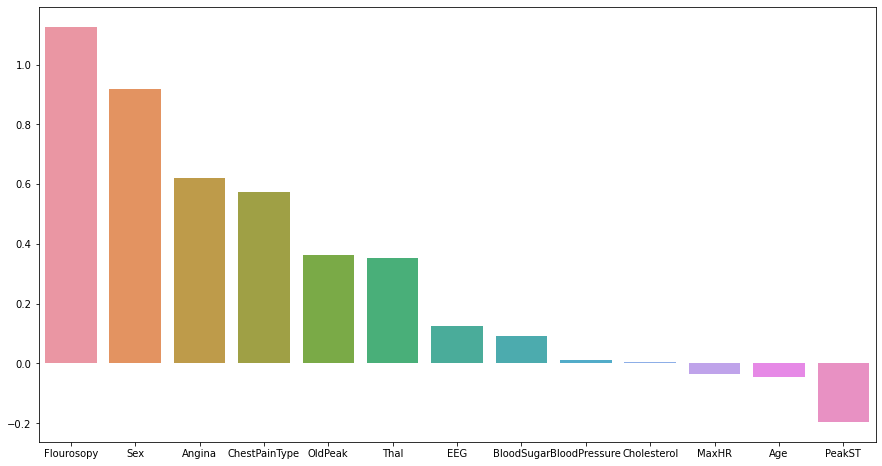

In [2031]:
plt.figure(figsize=(15,8))
sns.barplot(x=coef.index,y=coef.values)

* Insights: 
* We can see that field Flourosopy, Sex and Angina has strong relation with target column Heartdisease, followed by OldPeak, Sex and Thal
* Whereas PeakST has least correlation with target variable Heartdisease followed by Age and MaxHR.

#### Model Performance Evaluation
Let's now evaluate your model on the remaining 10% of the data, the test set.

Create the following evaluations:

* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [2032]:
# Imprt confusion matrics library from sklearn.metrics

In [2033]:
from sklearn.metrics import confusion_matrix

In [2034]:
# Calculate the confusion matrix 

In [2035]:
conf_matrix = confusion_matrix(pred_df, df_test_y)
conf_matrix

array([[26,  5],
       [ 4, 19]], dtype=int64)

In [2036]:
# Plot the grapgh for confusion matrix

<Figure size 576x576 with 0 Axes>

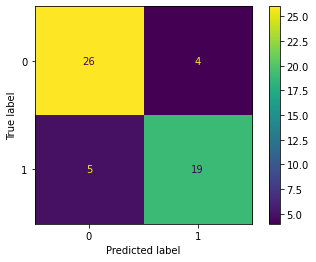

In [2037]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(logreg, df_test_x, df_test_y)

* Here we can see only 9 records from our testing dataset has wrong assumption, where we got our model 83.33% of accuracy.

In [2038]:
# Print the classification report 

In [2039]:
print(classification_report(df_test_y, pred_df))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        30
           1       0.83      0.79      0.81        24

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



In [2040]:
# Verify the Accuracy of the model

In [2041]:
Acc = conf_matrix.diagonal().sum() / conf_matrix.sum() * 100
Acc

83.33333333333334

* Here we can see only 9 records from our testing dataset has wrong assumption, where we got our model 83.33% of accuracy.

#### Probability:

* Check for the probability

In [2042]:
pred_prob_test = logreg.predict_proba(df_test_x)

In [2043]:
pred_valiue_prob = pd.DataFrame(pred_prob_test)
pred_valiue_prob.head()

,0,1
0,0.375536,0.624464
1,0.946424,0.053576
2,0.027935,0.972065
3,0.822988,0.177012
4,0.792676,0.207324


#### Area Under Curve

In [2044]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2045]:
log_run_curve = roc_auc_score(pred_df, df_test_y)
log_run_curve

0.832398316970547

In [2046]:
# Plot ROC curve

In [2047]:
from sklearn.metrics import plot_roc_curve

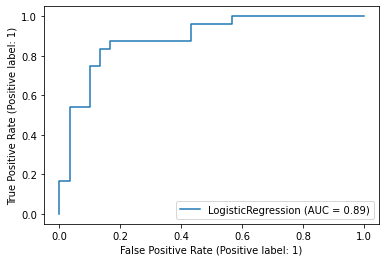

In [2048]:
plot_roc_curve(logreg, df_test_x, df_test_y);

### Model Improvisation:

Try to imporve your accuracy in this part:

### Standardization: 

Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).

In [2049]:
from sklearn.preprocessing import StandardScaler

In [2050]:
scalar = StandardScaler()

In [2051]:
scaled_x_train = scalar.fit_transform(df_train_x)
scaled_x_test = scalar.transform(df_test_x)

### 2)Build LogisticregressionCV model

In [2052]:
from sklearn.linear_model import LogisticRegressionCV

In [2053]:
logcv_model = LogisticRegressionCV(class_weight='Balanced', random_state=123)

In [2054]:
logcv_model.fit(scaled_x_train,df_train_y)

C:\Users\Fahim\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegressionCV(class_weight='Balanced', random_state=123)

In [2055]:
# Check for the C value of the model

In [2056]:
logcv_model.C_

array([2.7825594])

In [2057]:
# Check for the parameters by using which our improved dataset is built

In [2058]:
logcv_model.get_params()

{'Cs': 10,
 'class_weight': 'Balanced',
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 123,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [2059]:
# Coeficient values

In [2060]:
logcv_model.coef_

array([[-0.06333975,  0.74978547,  0.83158531,  0.36501703,  0.37064021,
        -0.06313544,  0.13153143, -0.528749  ,  0.30053348,  0.33238459,
         0.04351319,  1.10203046,  0.60905311]])

In [2061]:
# Check for the intercept values

In [2062]:
logcv_model.intercept_

array([-0.27468955])

In [2063]:
# Comapre the coeficient values wr.r.t. each field by creating dataframe for it

In [2064]:
coef_cv = pd.Series(data=logcv_model.coef_[0],index=df_train_x.columns)
coef_cv

Age             -0.063340
Sex              0.749785
ChestPainType    0.831585
BloodPressure    0.365017
Cholesterol      0.370640
BloodSugar      -0.063135
EEG              0.131531
MaxHR           -0.528749
Angina           0.300533
OldPeak          0.332385
PeakST           0.043513
Flourosopy       1.102030
Thal             0.609053
dtype: float64

In [2065]:
# Sort the above coef.dataframe with respect Desc order

In [2066]:
coef_cv = coef_cv.sort_values(ascending=False)
coef_cv


Flourosopy       1.102030
ChestPainType    0.831585
Sex              0.749785
Thal             0.609053
Cholesterol      0.370640
BloodPressure    0.365017
OldPeak          0.332385
Angina           0.300533
EEG              0.131531
PeakST           0.043513
BloodSugar      -0.063135
Age             -0.063340
MaxHR           -0.528749
dtype: float64

In [2067]:
# Plot the figure for improved coef values

<AxesSubplot:>

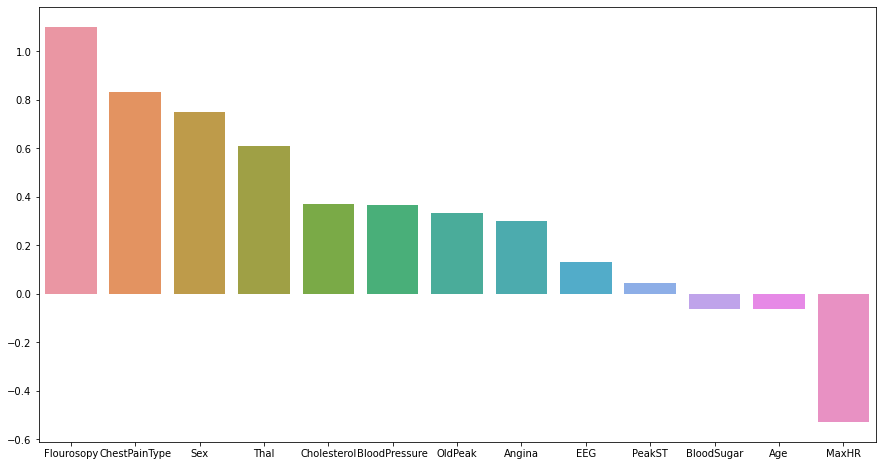

In [2068]:
plt.figure(figsize=(15,8))
sns.barplot(x=coef_cv.index,y=coef_cv.values)

* Insights: 
* We can see that field Flourosopy, Chestpain and Sex has strong relation with target column Heartdisease, followed by Thal, Chlorestrol and Bloodpressure after model improvisation.
* Whereas MaxHR has least correlation with target variable Heartdisease followed by Age and Bloodsugar.

### Model Performance Evaluation
Let's now evaluate your model on the remaining 10% of the data, the test set.

Create the following evaluations:

* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [2069]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [2070]:
pred_coef_cv = logcv_model.predict(scaled_x_test)
pred_coef_cv

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [2071]:
conf_matrix_cv = confusion_matrix(df_test_y,pred_coef_cv)
conf_matrix_cv

array([[26,  4],
       [ 4, 20]], dtype=int64)

<Figure size 576x576 with 0 Axes>

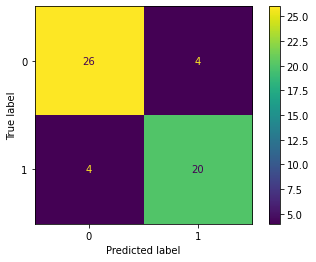

In [2072]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(logcv_model, scaled_x_test, df_test_y)

In [2073]:
# Print the classification report 

In [2074]:
print(classification_report(df_test_y, pred_coef_cv))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.83      0.83      0.83        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54



In [2075]:
# Verify the Accuracy of the model

In [2076]:
Acc_cv = conf_matrix_cv.diagonal().sum() / conf_matrix_cv.sum() * 100
Acc_cv

85.18518518518519

* Here we can see only 8 records from our testing dataset has wrong assumption, where we got our model 85.18% of accuracy.

#### Probability:

* Check for the probablity:

In [2077]:
pred_prob_scaled_test = logcv_model.predict_proba(scaled_x_test)

In [2078]:
pred_scaled_value_prob = pd.DataFrame(pred_prob_scaled_test)
pred_scaled_value_prob.head()

,0,1
0,0.326915,0.673085
1,0.947272,0.052728
2,0.044356,0.955644
3,0.905360,0.094640
4,0.886856,0.113144


In [2079]:
# Apply ROC and A-ROC

In [2080]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#### Area Undre the curve

In [2081]:
log_run_curve = roc_auc_score(pred_coef_cv, df_test_y)
log_run_curve

0.8500000000000001

In [2082]:
# Plot ROC curve

In [2083]:
from sklearn.metrics import plot_roc_curve

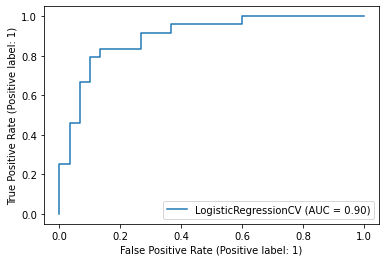

In [2084]:
plot_roc_curve(logcv_model, scaled_x_test, df_test_y);

### 3)Try to boost your accurcay by using SMOTE:

* In both of the above model we got same accuracy with 83.33%. So now we are going try SMOTE method to boost your accuracy.

In [2085]:
from imblearn.over_sampling import SMOTE

In [2086]:
log_smote = SMOTE(random_state=123,k_neighbors=7,sampling_strategy='auto', n_jobs=None)

In [2087]:
smote_x, smote_y = log_smote.fit_resample(df_train_x,df_train_y.values.ravel())

In [2088]:
log_sm = logreg.fit(smote_x, smote_y)
log_sm

C:\Users\Fahim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='Balanced', random_state=123)

In [2089]:
pred_smote = log_sm.predict(df_test_x)

In [2090]:
conf_matrix_sm = confusion_matrix(df_test_y,pred_smote)
conf_matrix_sm

array([[26,  4],
       [ 5, 19]], dtype=int64)

In [2091]:
print(classification_report(df_test_y, pred_smote))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        30
           1       0.83      0.79      0.81        24

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



In [2092]:
Acc_sm = conf_matrix_sm.diagonal().sum() / conf_matrix_sm.sum() * 100
Acc_sm

83.33333333333334

In [2093]:
# AS we can see accuray decreased after applying smote method, we cant go ahead with this method.

## Model testing:

* We are goinf ahead with Logistic Regression CV model after perfoeming Standardization on the dataset.

# A patient with the following features has come into the medical office:

* Age                      54.0
* Sex                       1.0
* ChestPainType             0.0
* BloodPressure           122.0
* Cholesterol             286.0
* BloodSugar                0.0
* EEG                       0.0
* MaxHR                   116.0
* Angina                    1.0
* OldPeak                   3.2
* PeakST                    1.0
* Flourosopy                2.0
* Thal                      2.0

What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?

For convience, we created an array of the features for the patient above

In [2094]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [2095]:
# EXPECTED PREDICTION
logcv_model.predict(patient)

array([1], dtype=int64)

In [2096]:
# EXPECTED PROBABILITY PER CLASS (Basically model should be extremely sure its in the 0 class)

logcv_model.predict_proba(patient)

array([[0., 1.]])

* The model predict that the patient belong to target class 1 way more than class 0.

#### Retrain the model on whole data and predict on the new patient

In [2097]:
scaled_x = scalar.fit_transform(df_train_x)

In [2098]:
logcv_model.fit(scaled_x, df_train_y)

C:\Users\Fahim\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegressionCV(class_weight='Balanced', random_state=123)

In [2099]:
# Predict the Heartdisease for the Patient 

In [2100]:
logcv_model.predict(patient)

array([1], dtype=int64)

In [2101]:
# Predict the probablity 

In [2102]:
logcv_model.predict_proba(patient)

array([[0., 1.]])

* The model predict that the patient is pretty belong the class 1 rather than class 0.

* Patient-2

In [2103]:
patient2 = [[ 48. ,   1. ,   2. , 130. , 275. ,   0. ,   1. , 139. ,   0. ,
          0.2,   2. ,   0.0 ,   2. ]]

In [2104]:
# Predict for Patient2

logcv_model.predict(patient2)

array([1], dtype=int64)

In [2105]:
# Predict the Probablity

logcv_model.predict_proba(patient2)

array([[0., 1.]])

* The model predict that the patient is pretty belong the class 1 rather than class 0.

#### Applying Statistics model to build model

In [2106]:
import statsmodels.formula.api as smf    # import statsmodel 

In [2107]:
# Build statsmodel

In [2108]:
stat_model = smf.logit(formula='HeartDisease ~ Age + Sex + ChestPainType + BloodPressure + Cholesterol + BloodSugar + MaxHR + EEG + Angina + OldPeak + PeakST + Flourosopy + Thal', data = df)

In [2109]:
stat_mode_result = stat_model.fit()

Optimization terminated successfully.
         Current function value: 0.332589
         Iterations 7


In [2110]:
print(stat_mode_result.summary())

                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                  270
Model:                          Logit   Df Residuals:                      256
Method:                           MLE   Df Model:                           13
Date:                Mon, 19 Aug 2024   Pseudo R-squ.:                  0.5159
Time:                        01:17:17   Log-Likelihood:                -89.799
converged:                       True   LL-Null:                       -185.48
Covariance Type:            nonrobust   LLR p-value:                 8.075e-34
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -8.4464      3.088     -2.735      0.006     -14.499      -2.394
Age              -0.0175      0.026     -0.680      0.497      -0.068       0.033
Sex               1.5421      0.541     

* As our model ( log-Likelihood model) has score -89.799 whereas baseline model (LL null model) has score -185.48, our model much better than the baseline model

* Confidence intervals plays important role in this statsmodel building, whereas except MaxHR every other fields has confidience interval not equal to 0.00. 
* Hence, in this we can try by droping MaxHR field from dataset.

In [2111]:
stat_model_1 = smf.logit(formula='HeartDisease ~ Age + Sex + ChestPainType + BloodPressure + Cholesterol + BloodSugar + EEG + Angina + OldPeak + PeakST + Flourosopy + Thal', data = df)

In [2112]:
stat_mode_result_1 = stat_model_1.fit()

Optimization terminated successfully.
         Current function value: 0.340161
         Iterations 7


In [2113]:
print(stat_mode_result_1.summary())

                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                  270
Model:                          Logit   Df Residuals:                      257
Method:                           MLE   Df Model:                           12
Date:                Mon, 19 Aug 2024   Pseudo R-squ.:                  0.5048
Time:                        01:17:18   Log-Likelihood:                -91.843
converged:                       True   LL-Null:                       -185.48
Covariance Type:            nonrobust   LLR p-value:                 1.367e-33
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -12.4446      2.437     -5.107      0.000     -17.221      -7.668
Age               0.0023      0.023      0.097      0.923      -0.044       0.048
Sex               1.4527      0.533     

* As our model ( log-Likelihood model) has score -91.853 whereas baseline model (LL null model) has score -185.48, our model much better than the baseline model

### Thank you